In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os, json

In [2]:
comp_img = "../../data/test/kodim04.png"
dist = "../../data/jpeg_kodim"

In [3]:
def psnr(x, y):
    psnr = 10 * np.log10(255**2 / ((x - y)**2).mean())
    return psnr

In [4]:
qps = [70, 80, 90, 95]

In [5]:
jpeg_info = {}

In [6]:
for qp in qps:
    for img_name in [f"kodim{i:02}" for i in range(1, 25)]:
        im = Image.open(f"../../data/test/{img_name}.png")
        w, h = im.size
        
        im.save(f"{dist}/{qp}_{img_name}.jpg", quality=qp, optimize=True, progressive=True)
        
        bpp = os.path.getsize(f"{dist}/{qp}_{img_name}.jpg") * 8 / (w * h * 3)
        p = psnr(np.array(im), np.array(Image.open(f"{dist}/{qp}_{img_name}.jpg")))
        if jpeg_info.get(qp) is None:
            jpeg_info[qp] = {}
        jpeg_info[qp][img_name] = (p, bpp)

In [7]:
jpeg_info

{70: {'kodim01': (32.67873495094499, 0.5475056966145834),
  'kodim02': (35.04334237475957, 0.3173285590277778),
  'kodim03': (37.04114803015484, 0.2726508246527778),
  'kodim04': (35.35042385638207, 0.3377278645833333),
  'kodim05': (32.85702874226021, 0.6016913519965278),
  'kodim06': (34.01973456364412, 0.4424506293402778),
  'kodim07': (36.48342090745476, 0.329345703125),
  'kodim08': (32.66593254846006, 0.6033393012152778),
  'kodim09': (36.73155641527707, 0.2760213216145833),
  'kodim10': (36.474594418701834, 0.3117811414930556),
  'kodim11': (34.51572529762144, 0.4120686848958333),
  'kodim12': (36.660748446423966, 0.2895304361979167),
  'kodim13': (31.503730895513623, 0.6635945638020834),
  'kodim14': (33.496027745376665, 0.5014309353298612),
  'kodim15': (35.625853770338196, 0.3083157009548611),
  'kodim16': (35.654579536581934, 0.3406439887152778),
  'kodim17': (36.23547083323662, 0.3377414279513889),
  'kodim18': (33.395792464185156, 0.4876641167534722),
  'kodim19': (34.6796

In [8]:
jpeg_info_res = {}

for qp in qps:
    if int(qp) == 95:
        continue
    psnr_mean = np.mean([
        psnr for _, (psnr, bpp) in jpeg_info[qp].items()
    ])
    bpp_mean = np.mean([
        bpp for _, (psnr, bpp) in jpeg_info[qp].items()
    ])
    jpeg_info_res[qp] = (psnr_mean, bpp_mean) 

In [9]:
jpeg_info_res

{70: (34.8757266948005, 0.3975253634982639),
 80: (35.92152076329122, 0.5014566492151331),
 90: (38.27510735834608, 0.7356556080005787)}

In [12]:
my_info = {}
runs_names = os.listdir('../../mbtsr/runs')

for run_name in runs_names:
    run_stats = json.load(open(f'../../mbtsr/runs/{run_name}/res.json'))
    my_info[run_name] = (run_stats['psnr_mean'], run_stats['bpp_mean'])

In [ ]:
my_info

In [ ]:
def make_grid():
    fig, ax = plt.subplots(3, 4)

    ax[0, 0].imshow(np.array(Image.open(comp_img))[50:500, 50:500])
    # ax[0, 0].set_axis_off()
    ax[0, 0].set_xlabel(f"GT")
    ax[0, 0].set_title(f"PSNR: +inf\nbpp: 24.0")

    for i in range(len(jpeg_info_res)):
        qp = qps[i]
        mat = np.array(Image.open(f"{dist}/{qp}_kodim04.jpg"))

        ax[0, i + 1].imshow(mat[50:500, 50:500])
        ax[0, i + 1].set_xlabel(f"JPEG {qp}")
        # ax[0, i].set_axis_off()
        ax[0, i + 1].set_title(f"QP: {qp}\nPSNR: {round(jpeg_info_res[qp][0], 2)}\nbpp: {round(jpeg_info_res[qp][1], 4)}")
        ax[0, i + 1].tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
        
    for i, mp in enumerate(list(my_info.keys())):
        mat = np.array(Image.open(f"../runs/{mp}/pic.png"))
        ax[i // 4 + 1, i % 4].imshow(mat[50:500, 50:500])
        # ax[1, i].set_axis_off()
        psnr = my_info[mp][0]
        if psnr == max([x[0] for _, x in my_info.items()]):
            ax[i // 4 + 1, i % 4].set_title(f"\nPSNR: {round(my_info[mp][0], 2)}\nbpp: {round(my_info[mp][1], 4)}", color='red')
        else:
            ax[i // 4 + 1, i % 4].set_title(f"\nPSNR: {round(my_info[mp][0], 2)}\nbpp: {round(my_info[mp][1], 4)}")
        ax[i // 4 + 1, i % 4].set_xlabel("\n".join(mp.split('@')), fontsize=9)
        ax[i // 4 + 1, i % 4].tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
    
    fig.set_size_inches(18, 17)
    # plt.axis('off')
    plt.show()

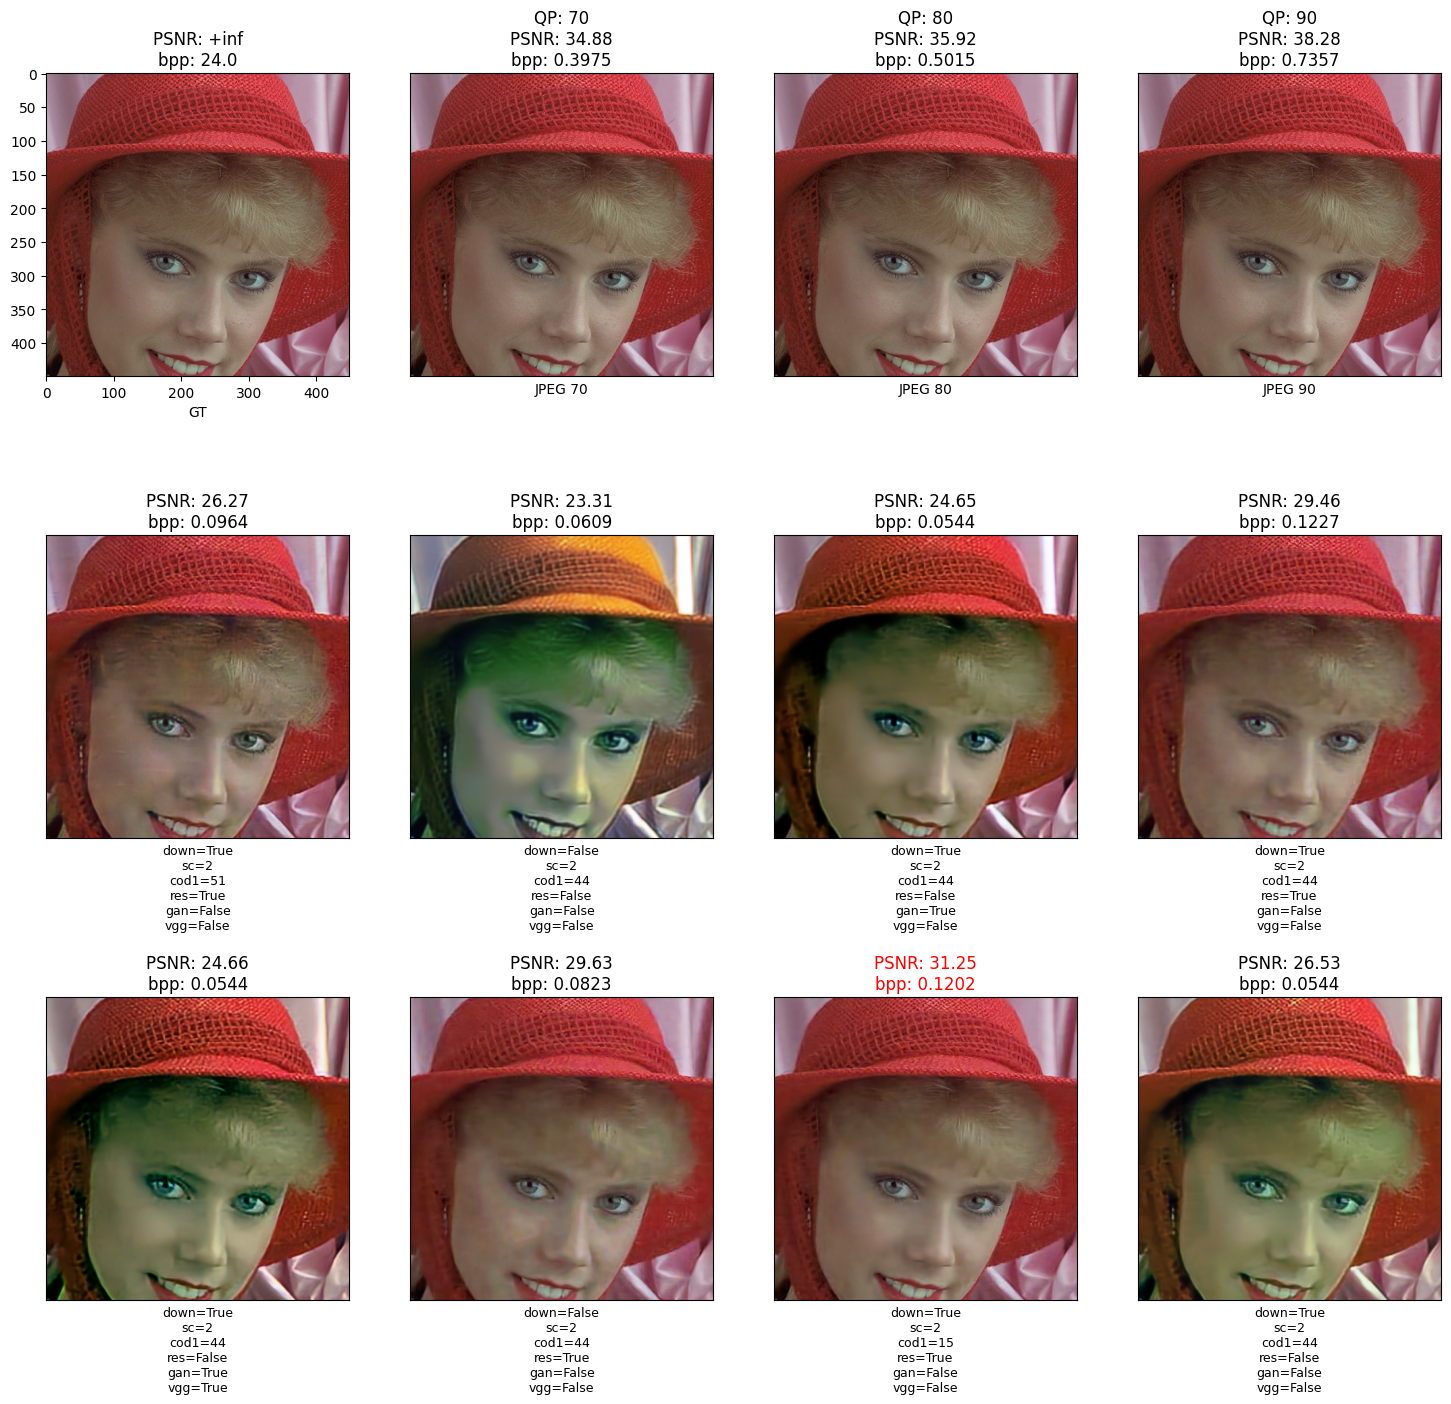

In [ ]:
make_grid()

In [29]:
dots_jpeg = ['JPEG 70', 34.88, 0.3975, 'JPEG 80', 35.92, 0.5015, 'JPEG 70', 38.28, 0.7357]
dots_my = ['my_1', 26.27, 0.0964, 'my_2', 23.31, 0.0609, 'my_3', 24.65, 0.0544, 'my_4', 29.46, 0.1227, 'my_5', 24.66, 0.0544, 'my_6', 29.63, 0.0823, 'my_7', 31.25, 0.1202, 'my_8', 26.53, 0.0544]
dots_my_plot = ['my_8', 26.53, 0.0544, 'my_6', 29.63, 0.0823, 'my_7', 31.25, 0.1202,]

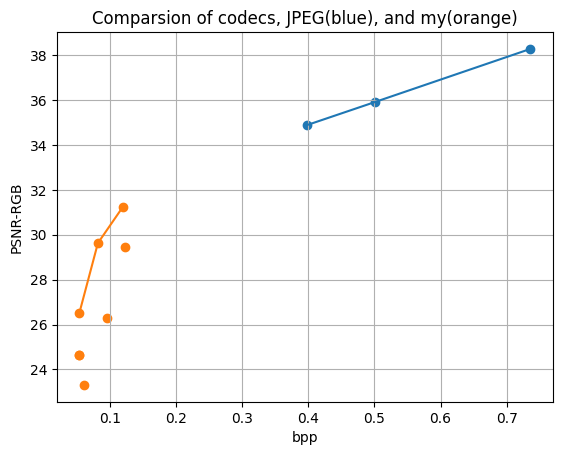

In [33]:
plt.plot(dots_jpeg[2::3], dots_jpeg[1::3])
plt.scatter(dots_jpeg[2::3], dots_jpeg[1::3])
plt.scatter(dots_my[2::3], dots_my[1::3])
plt.plot(dots_my_plot[2::3], dots_my_plot[1::3])
plt.ylabel('PSNR-RGB')
plt.xlabel('bpp')
plt.title('Comparsion of codecs, JPEG(blue), and my(orange)')
plt.grid(True)